#### Türkiye Hava Durumu – Kasım 2024: Bir Geçiş Ayının Portresi

Kasım, Türkiye’de yazın son nefesiyle kışın ilk adımlarının çarpıştığı aydır. Bu veri seti, tam da o eşiği yakalıyor: kıyılarda lodosla ılıklık sürerken, iç ve doğu kesimlerde sıcaklık hızla düşüyor; yağmur–kar sınırı her gün başka bir şehre taşınıyor. Tek tek günlerin değil, bir ayın ritmini tutan bu veri; şehirlerin nasıl serinlediğini, yağışın nerede yoğunlaştığını, rüzgârın ulaşım ve enerji talebini nasıl etkilediğini gösteren bir kronik gibi okunuyor.

_Bu hikâyede üç ana iz sürüyoruz:_

+ Isı Haritası: Gündüz–gece farklarının büyüdüğü noktalar, konut ısınma baskısının işareti.

+ Yağış Deseni: Kıyıdan içeri uzanan yağış kolları, tarım ve şehir altyapısı için uyarı niteliğinde.

+ Rüzgârın İzleri: Lodos ve poyraz geçişleri, deniz–hava ulaşımı ve yenilenebilir üretim planlamasıyla kesişiyor.

_Veri, yerel yönetimlerin “hazırlık takvimi”, çiftçinin “ekim-biçim stratejisi”, enerji planlamacısının “pik yük” tahmini için bir pusula. Sınırları net: yalnızca Kasım 2024; ama doğru sorularla, iklim eğilimlerini okumak için güçlü bir büyüteç._

*Bu veriyle sorulacak sorular*

+ Hangi bölgeler Kasım’da mevsim normallerinden daha ılık/serin seyretti?

+ Yağış hangi günlerde kümelendi; taşkın riski nerede yoğunlaştı?

+ Rüzgâr rejimi enerji üretimi ve deniz ulaşımını nasıl etkiledi?

+ Görselleştirme planı (5’li set)

+ Isı dağılımı histogramı (mevsim kayması var mı?)

+ Bölgelere göre sıcaklık boxplot’u (yayılım/oynaklık)

+ Sıcaklık–nem saçılımı + regresyon (hissedilen hava)

+ Günlük ortalama sıcaklık/yağış zaman grafiği (trend ve kırılmalar)

+ Rüzgâr hız–yön yoğunluk görselleştirmesi (polar/3B saçılım)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
ImportWarning

df = pd.read_csv("hava_durumu_tahmini (5).csv")

In [3]:
df.head()


,id,Şehir,Tarih,Durum,Sıcaklık (°C)
0,0,Istanbul,2024-11-15,Orta kuvvetli yağmurlu,13.0
1,1,Istanbul,2024-11-16,Bölgesel düzensiz yağmur yağışlı,11.1
2,2,Istanbul,2024-11-17,Parçalı Bulutlu,12.0
3,3,Istanbul,2024-11-18,Çok bulutlu,12.0
4,4,Istanbul,2024-11-19,Güneşli,11.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1022 non-null   int64  
 1   Şehir          1022 non-null   object 
 2   Tarih          1022 non-null   object 
 3   Durum          1022 non-null   object 
 4   Sıcaklık (°C)  1022 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.1+ KB


In [8]:
# 'Tarih' sütununu datetime tipine çevirme
df['Tarih'] = pd.to_datetime(df['Tarih'])

In [11]:
# Ortak kullanılan veriler
city_avg_temp = df.groupby('Şehir')['Sıcaklık (°C)'].mean().sort_values(ascending=False)
weather_counts = df['Durum'].value_counts()
top_cities_line = df['Şehir'].value_counts().nlargest(5).index.tolist()
df_filtered_line = df[df['Şehir'].isin(top_cities_line)]
top_10_cities_bar = pd.concat([city_avg_temp.head(5), city_avg_temp.tail(5)]).sort_values(ascending=False)
final_counts_pie = pd.concat([weather_counts.nlargest(5), pd.Series({'Diğer': weather_counts.iloc[5:].sum()})])

C:\Users\pc\AppData\Local\Temp\ipykernel_37340\2127579924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Şehir', y='Sıcaklık (°C)', data=df, order=ordered_cities, palette='Spectral')


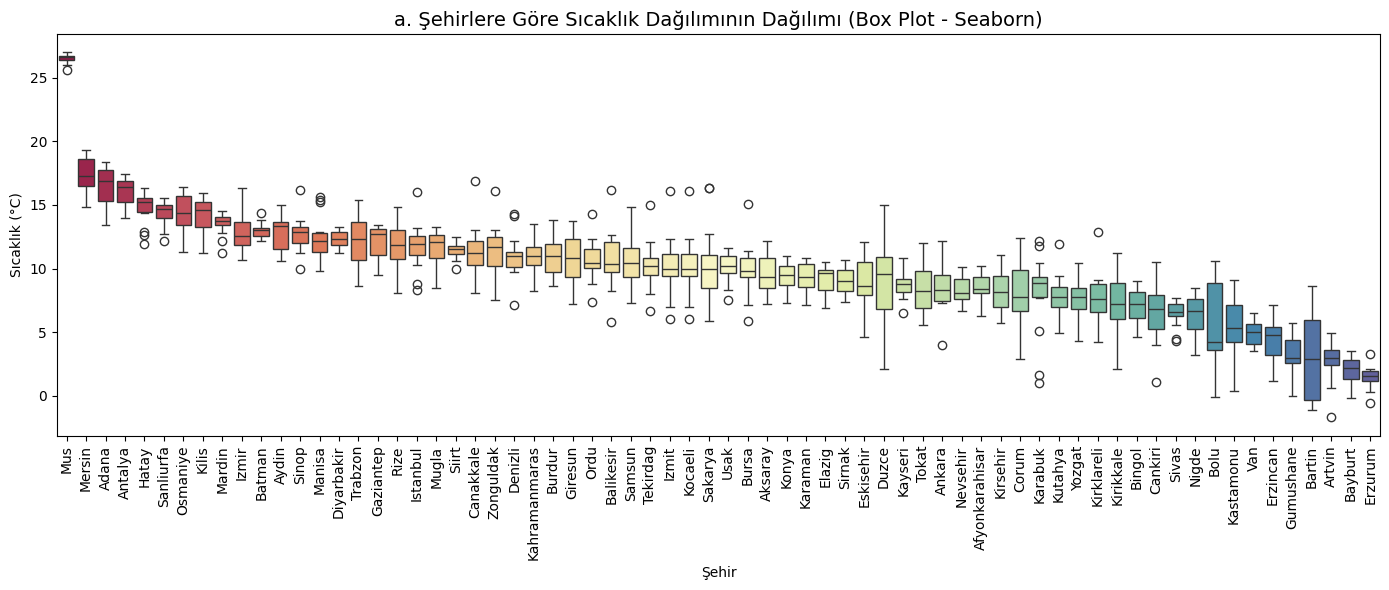

In [12]:
plt.figure(figsize=(14, 6))
# Şehirleri ortalama sıcaklığa göre sıralama
ordered_cities = city_avg_temp.index
sns.boxplot(x='Şehir', y='Sıcaklık (°C)', data=df, order=ordered_cities, palette='Spectral')
plt.title('a. Şehirlere Göre Sıcaklık Dağılımının Dağılımı (Box Plot - Seaborn)', fontsize=14)
plt.xlabel('Şehir')
plt.ylabel('Sıcaklık (°C)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_37340\520511988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Şehir', y='Sıcaklık (°C)', data=df_filtered_line, palette='Pastel1',


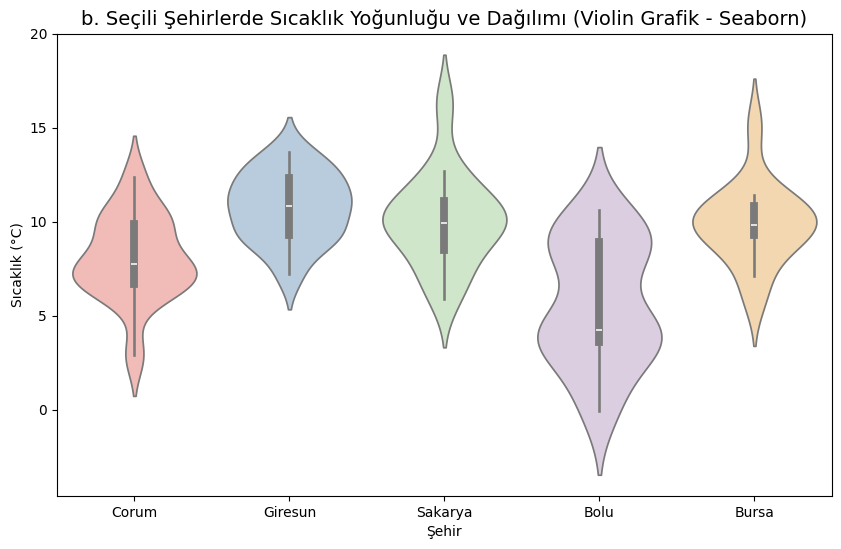

In [13]:
plt.figure(figsize=(10, 6))
# Sadece en çok veriye sahip 5 şehir için
sns.violinplot(x='Şehir', y='Sıcaklık (°C)', data=df_filtered_line, palette='Pastel1',
               order=top_cities_line)
plt.title('b. Seçili Şehirlerde Sıcaklık Yoğunluğu ve Dağılımı (Violin Grafik - Seaborn)', fontsize=14)
plt.xlabel('Şehir')
plt.ylabel('Sıcaklık (°C)')
plt.show()

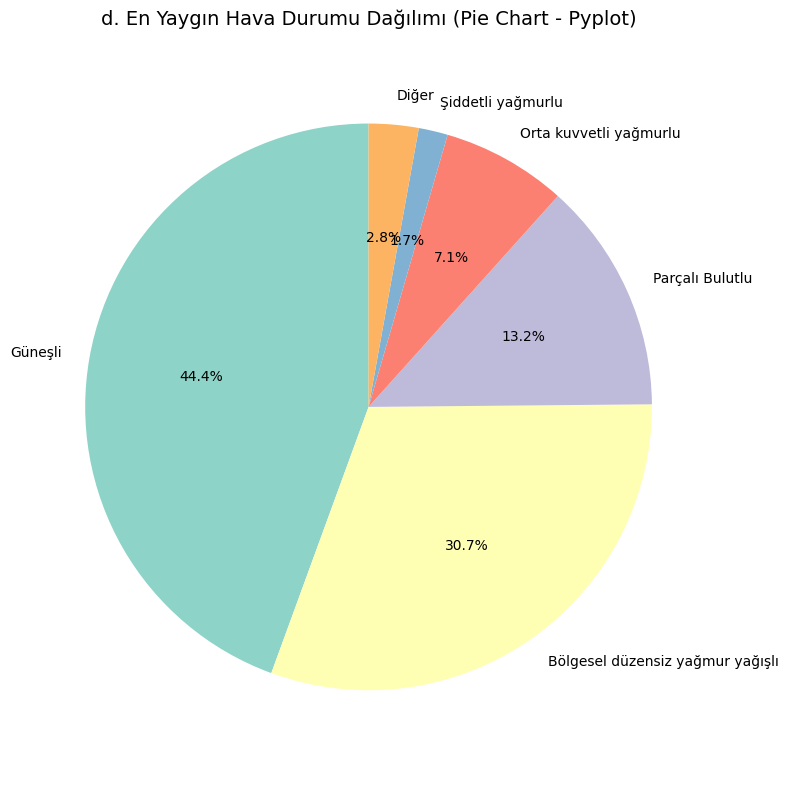

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(final_counts_pie.values, labels=final_counts_pie.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('Set3'))
plt.title('d. En Yaygın Hava Durumu Dağılımı (Pie Chart - Pyplot)', fontsize=14)
plt.axis('equal') # Pastanın daire şeklinde olması için
plt.tight_layout()
plt.show()

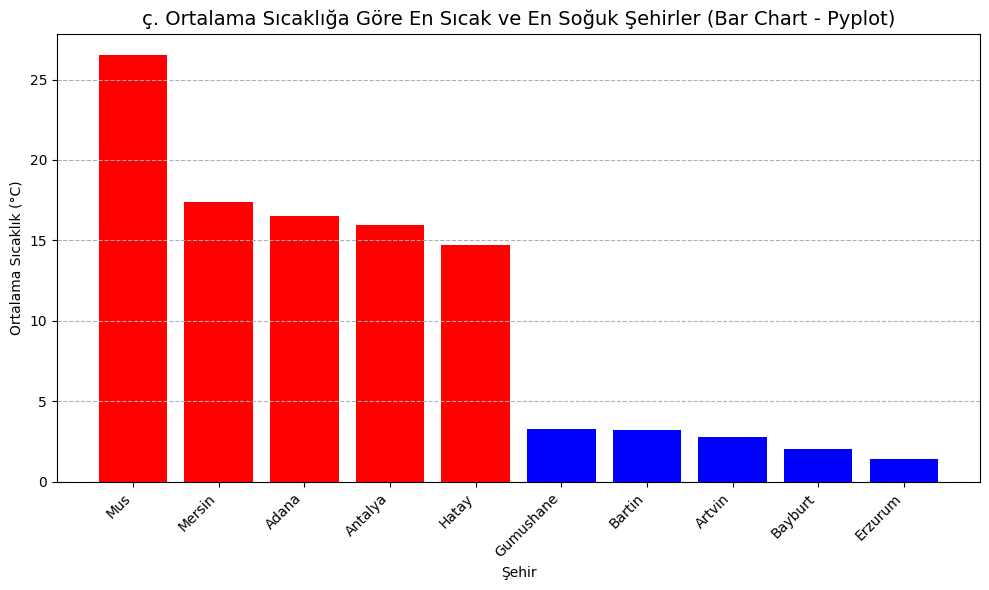

In [15]:
colors_bar = ['red' if temp >= top_10_cities_bar.mean() else 'blue' for temp in top_10_cities_bar]

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities_bar.index, top_10_cities_bar.values, color=colors_bar)
plt.title('ç. Ortalama Sıcaklığa Göre En Sıcak ve En Soğuk Şehirler (Bar Chart - Pyplot)', fontsize=14)
plt.xlabel('Şehir')
plt.ylabel('Ortalama Sıcaklık (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

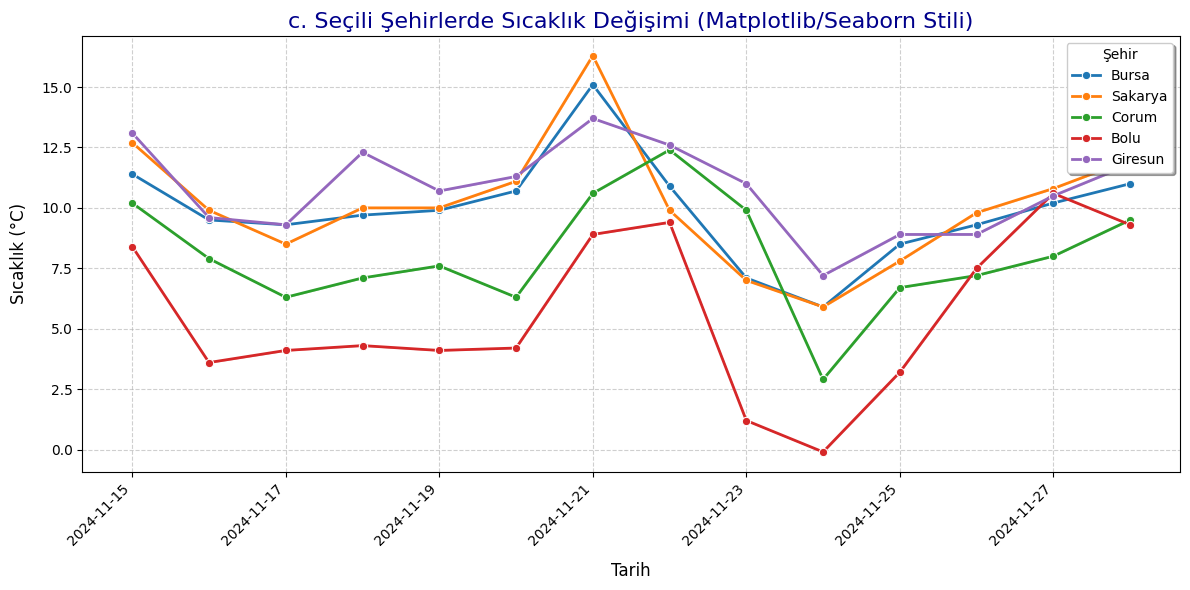

In [17]:
# ==============================================================================
# Alternatif Stil: Çizgi Grafik (Line Chart) - SEABORN/MATPLOTLIB
# ==============================================================================
plt.figure(figsize=(12, 6))

# Seaborn lineplot kullanarak Plotly ile aynı görseli oluşturma
sns.lineplot(data=df_filtered_line, 
             x='Tarih', 
             y='Sıcaklık (°C)', 
             hue='Şehir', 
             marker='o', # Noktaları ekler
             linewidth=2)

# Grafik başlıkları ve etiketleri (Matplotlib ile detaylı stil)
plt.title('c. Seçili Şehirlerde Sıcaklık Değişimi (Matplotlib/Seaborn Stili)', fontsize=16, color='darkblue')
plt.xlabel('Tarih', fontsize=12, labelpad=10)
plt.ylabel('Sıcaklık (°C)', fontsize=12, labelpad=10)

# Eksen ayarları
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Lejantı özelleştirme
plt.legend(title='Şehir', loc='upper right', frameon=True, shadow=True)

plt.tight_layout()

# Grafiği göstermek için kaydetme
plt.savefig("c_line_chart_yeni_stil.png")
# plt.show() # Kendi ortamınızda göstermek için bu satırı kullanabilirsiniz.